# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot. The data can be found [here](https://drive.google.com/file/d/1tgx8nnEXLcqy1ds_99T_14-2B9TM-Gne/view?usp=sharing), please downloand and place them in your local data folder from which you can read them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
liquor = pd.read_csv('..\\data\\liquor_store_sales.csv')
liquor.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

<AxesSubplot:xlabel='ItemType'>

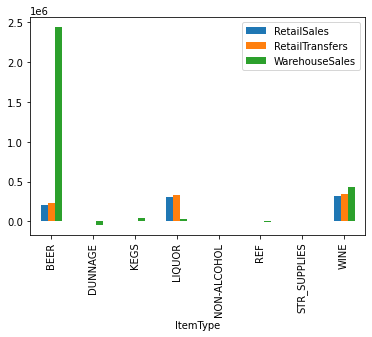

In [3]:
liquor_sum = liquor[['RetailSales', 'RetailTransfers', 'WarehouseSales','ItemType']].groupby(['ItemType']).agg('sum')
liquor_sum.plot.bar()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [4]:
liquor['Total_sales'] = liquor['RetailSales'] + liquor['RetailTransfers'] + liquor['WarehouseSales']
top10 = liquor[['Total_sales','Supplier']].groupby(['Supplier']).agg('sum').sort_values(by='Total_sales',ascending=False).nlargest(10,columns='Total_sales').reset_index()
top10 = top10['Supplier'].tolist()
top10_supp = liquor.loc[liquor['Supplier'].isin(top10)]
top10_supp.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales,Total_sales
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0,8.0
7,2017,4,JIM BEAM BRANDS CO,10197,KNOB CREEK BOURBON 9YR - 100P - 1.75L,LIQUOR,0.0,32.0,0.0,32.0
10,2017,4,JIM BEAM BRANDS CO,10243,OLD GRAND DAD BOURBON 100P - 750ML,LIQUOR,0.0,3.0,0.0,3.0
35,2017,4,THE WINE GROUP,10439,CONCANNON FOUNDERS CAB - 750ML,WINE,0.0,3.0,0.0,3.0
36,2017,4,THE WINE GROUP,10441,LOVE P/NOIR - 750ML,WINE,0.0,16.0,0.0,16.0


<AxesSubplot:>

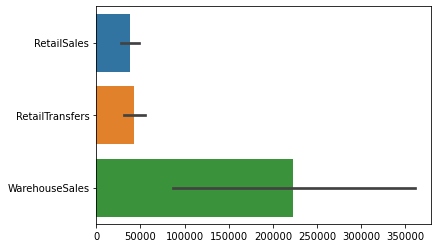

In [5]:
sales_mix = top10_supp[['RetailSales', 'RetailTransfers', 'WarehouseSales','Supplier']].groupby(['Supplier']).agg('sum').reset_index()
sns.barplot(data=sales_mix, orient = 'h')
#paolo ok- nice viz- you could add a legend

## 3. Create a bar-chart chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

<AxesSubplot:xlabel='Month'>

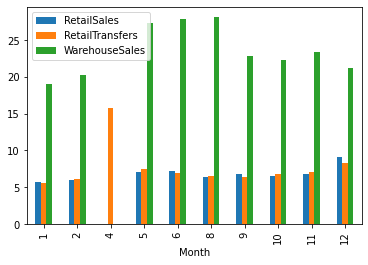

In [6]:
sales_time = pd.pivot_table(liquor, values=['RetailSales', 'RetailTransfers', 'WarehouseSales'], index=['Month'], aggfunc=np.mean)
sales_time.plot.bar()
#paolo -yes nice! Could you try to show the year as x-label?

## 4. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [7]:
liquor['Date'] = pd.to_datetime(liquor[['Year', 'Month']].assign(DAY=1))

<AxesSubplot:xlabel='Date', ylabel='RetailSales'>

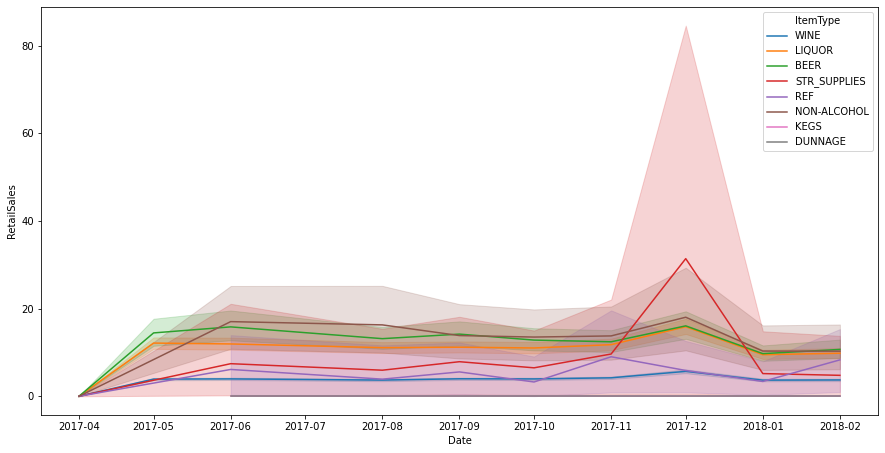

In [8]:
plt.figure(figsize=(15,7.5))
sns.lineplot(x = 'Date', y = 'RetailSales', hue = 'ItemType', data = liquor)

In [12]:
#paolo: ok- question: are you summing the retail sales  per item?

## 6. Plot the same information as above (i.e. Q5) but as a bar chart.

In [9]:
Q6 = liquor[['Date', 'RetailSales', 'ItemType']]

<AxesSubplot:xlabel='Date', ylabel='RetailSales'>

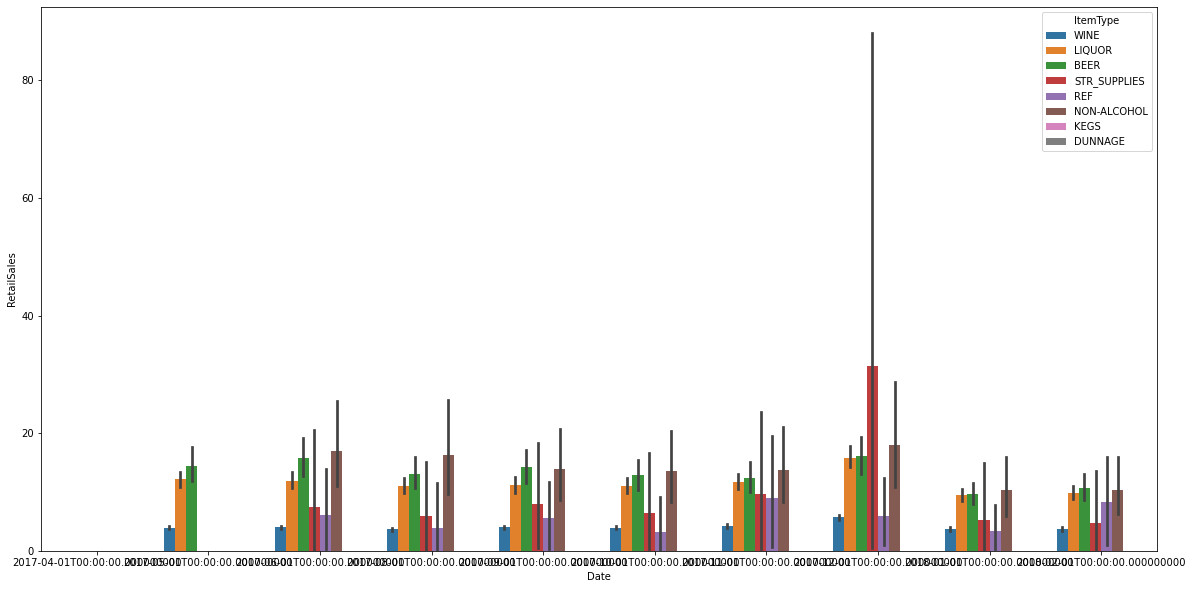

In [10]:
plt.figure(figsize=(20,10))
sns.barplot(x='Date', y = 'RetailSales', hue = 'ItemType', data = liquor)

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

In [11]:
plt.figure(figsize=(10,5))
sns.relplot(x = 'RetailSales', y = 'RetailTransfers', hue = 'ItemType', data = liquor)
plt.show()
#paolo: I get error here but could be sue to my version of pandas
# did you try lmplot?

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 720x360 with 0 Axes>

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 360x360 with 1 Axes>

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [13]:
liquor_scatter = liquor[['ItemType', 'RetailSales', 'RetailTransfers', 'WarehouseSales']]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

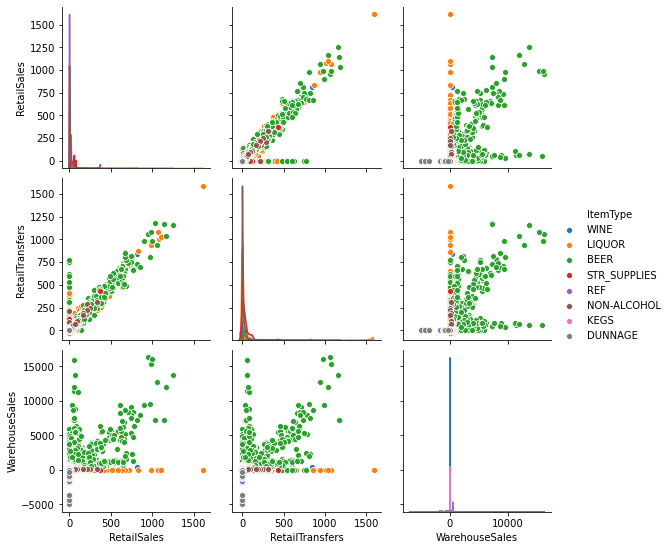

In [14]:
sns.pairplot(liquor_scatter, hue='ItemType')

In [16]:
#paolo check ok